# Diffusion over the surface of a cube

The unit testing of `MeshArrays.jl` uses a global smoother function. This process can be applied to a field of random noise to "smooth it out". It attenuates the noise magnitude in  very predictable fashion. The main code is inside `MeshArrays.demo2` which can just as easily be applied to e.g. cubed-sphere or `llc` Earth grids.

#### First, let's load the `MeshArrays` and `Plots`  modules

In [1]:
using MeshArrays, Plots

Grid the `6` faces of a cube with `16*16` points on each face. Distances, areas, etc. are all set to `1.0` for simplicity.

In [2]:
GridVariables=GridOfOnes("cs",6,16);

#### Smooth out random noise over the 6 faces of a cube

The orignal noise field is `DemoVariables[1]` while the smoothed one
is `DemoVariables[2]`

In [3]:
DemoVariables=MeshArrays.demo2(GridVariables);

#### Include `heatmap` method to vizualize results

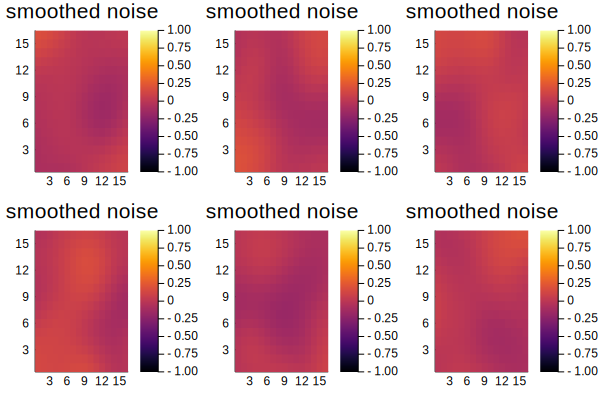

In [4]:
include(joinpath(dirname(pathof(MeshArrays)),"Plots.jl"))
heatmap(DemoVariables[2],title="smoothed noise",clims=(-1.0,1.0))

Note the increased smoothness and reduced magnitude as compared with the initial condition:

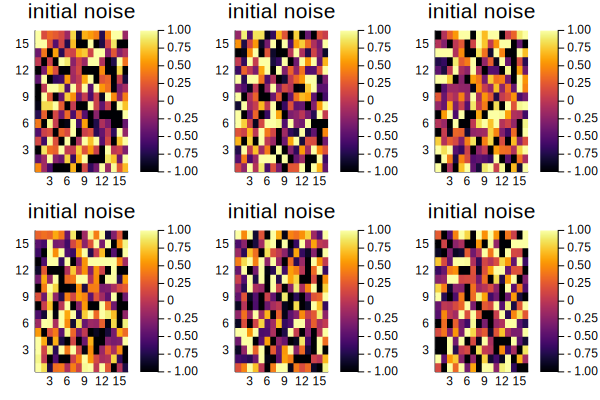

In [5]:
heatmap(DemoVariables[1],title="initial noise",clims=(-1.0,1.0))

To finish, let's benchmark `smooth` as a function of smoothing scale parameters:

In [6]:
Rini=DemoVariables[1]
DXCsm=DemoVariables[3]
DYCsm=DemoVariables[4]
@time Rend=smooth(Rini,DXCsm,DYCsm,GridVariables);
@time Rend=smooth(Rini,2DXCsm,2DYCsm,GridVariables);

  0.003265 seconds (8.21 k allocations: 6.797 MiB)
  0.023214 seconds (30.69 k allocations: 24.272 MiB, 40.60% gc time)
